## Loading Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the dataset
insurance_data = pd.read_csv("insurance.csv")
#View the Data
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
#Number of Rows and columns in the dataset
insurance_data.shape

(1338, 7)

In [4]:
#More information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Statistical description about the dataset
insurance_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
# statiscal information of the categorical features 
insurance_data.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
#Check for missing values
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## Exploratory Data Analysis

Text(0, 0.5, 'Count')

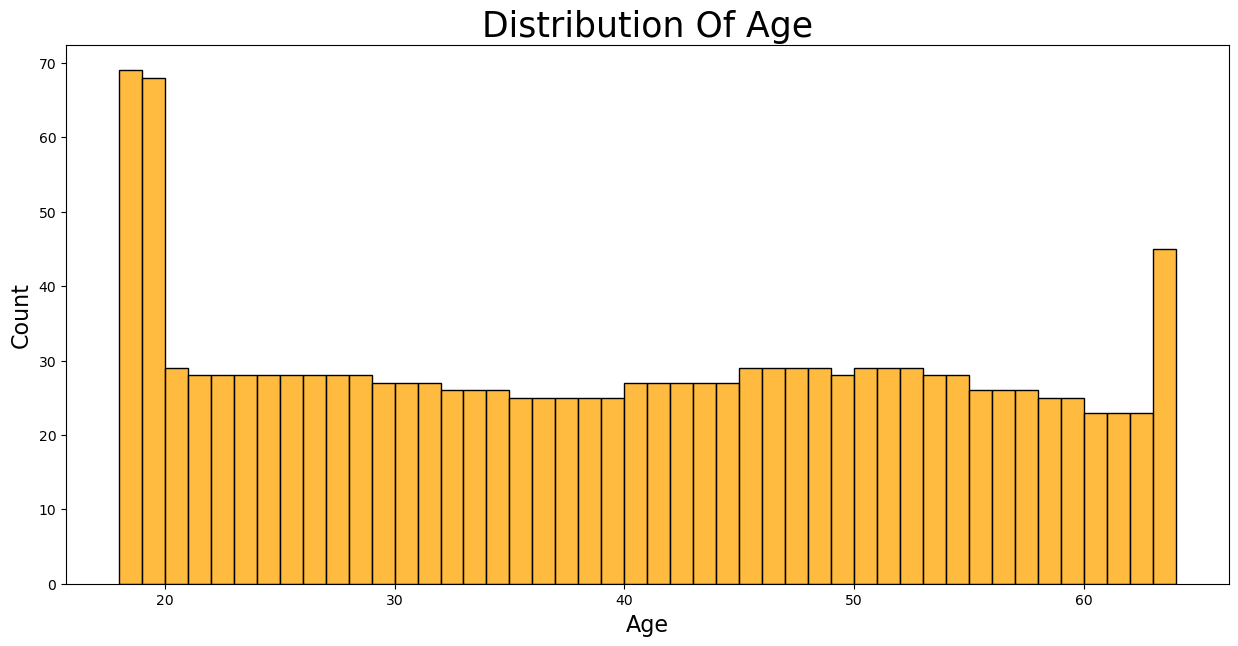

In [8]:
#Distrubution of Age
plt.figure(figsize=(15,7))
plt.title("Distribution Of Age",fontsize=25)
bp1=sns.histplot(x='age',data=insurance_data,bins=46,color='orange')
bp1.set_xlabel("Age", fontsize=16)
bp1.set_ylabel("Count", fontsize=16)

In [9]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0, 0.5, 'count')

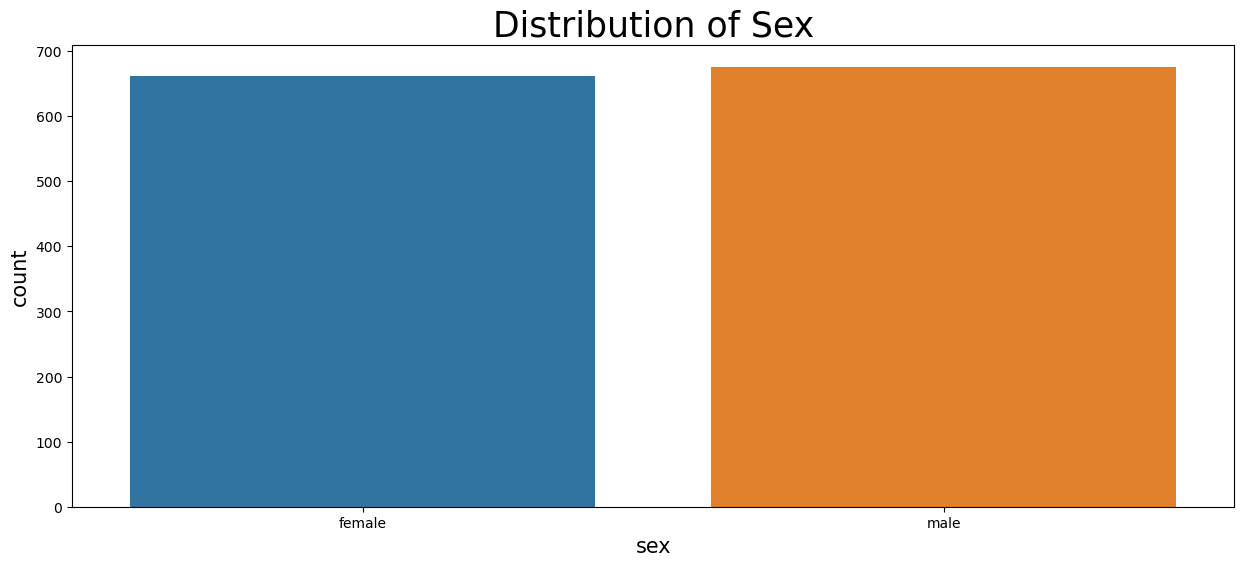

In [10]:
#Distrubution of Sex
plt.figure(figsize=(15,6))
plt.title("Distribution of Sex",fontsize=25)
s=sns.countplot(x='sex',data=insurance_data)
s.set_xlabel("sex", fontsize=15)
s.set_ylabel("count", fontsize=15)

C:\Users\SanthanaLakshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

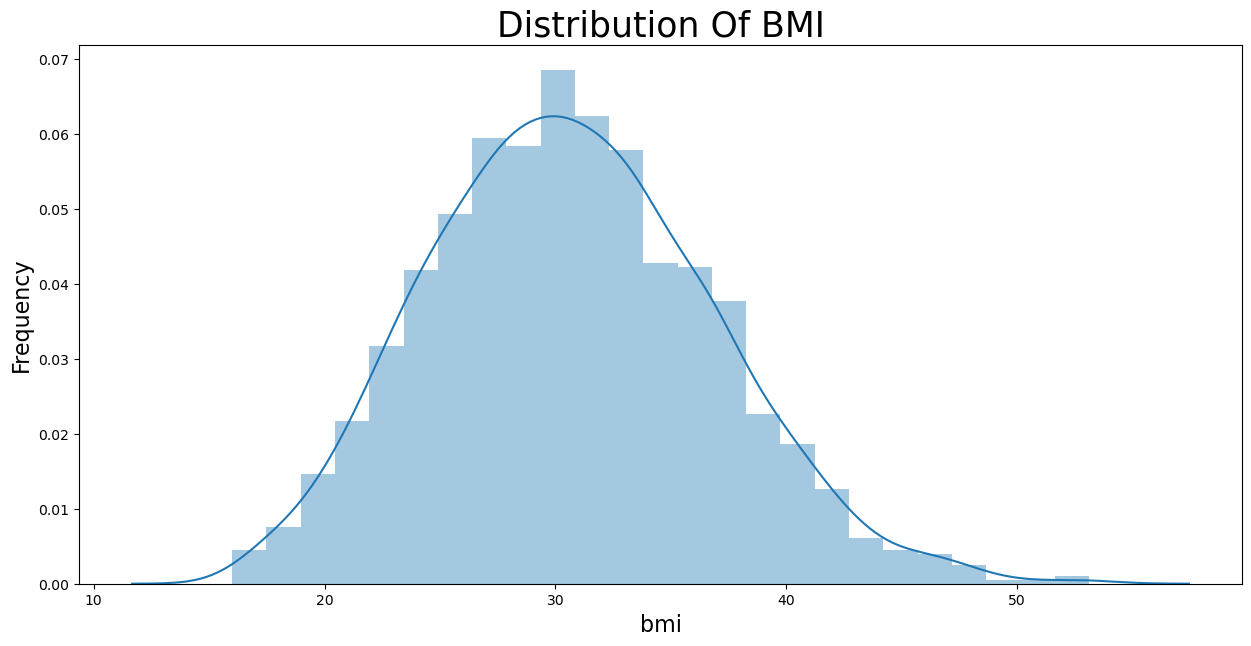

In [11]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of BMI",fontsize=25)
bmi=sns.distplot(insurance_data['bmi'])
bmi.set_xlabel("bmi", fontsize=16)
bmi.set_ylabel("Frequency", fontsize=16)

Text(0, 0.5, 'count')

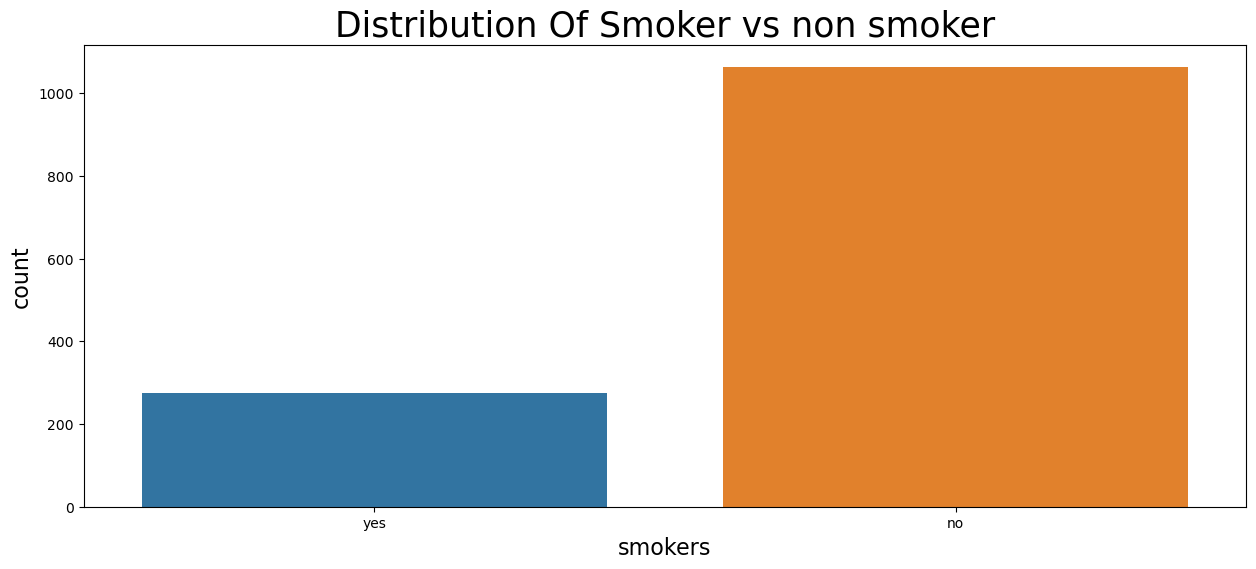

In [12]:
plt.figure(figsize=(15,6))
plt.title("Distribution Of Smoker vs non smoker",fontsize=25)
smo=sns.countplot(x='smoker',data=insurance_data)
smo.set_xlabel("smokers", fontsize=16)
smo.set_ylabel("count", fontsize=16)



Text(0, 0.5, 'count')

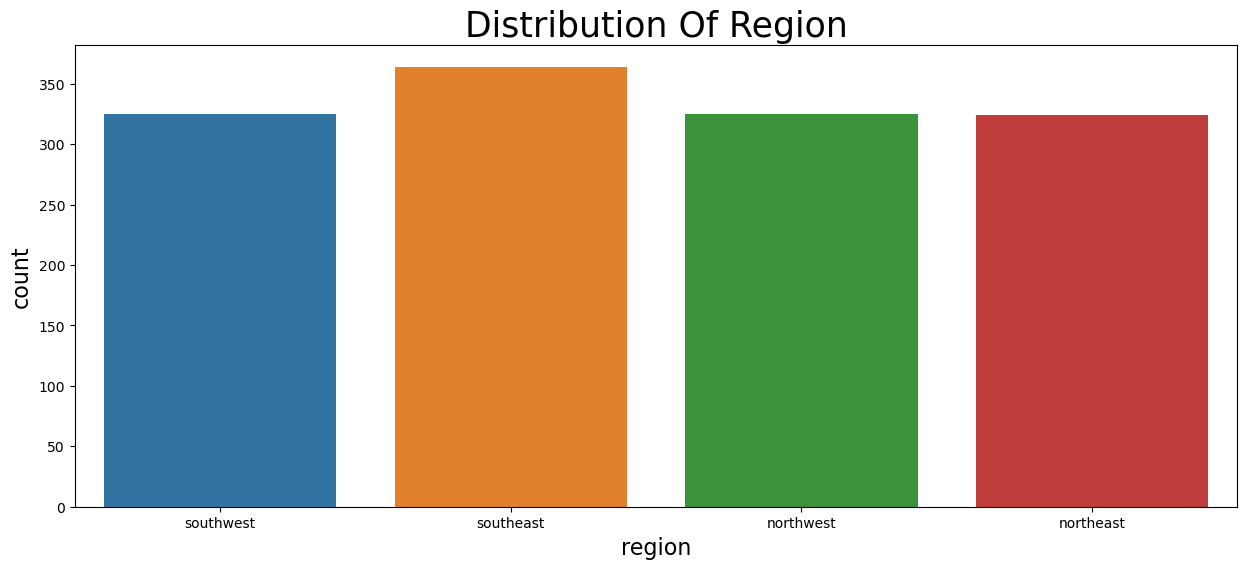

In [13]:
plt.figure(figsize=(15,6))
plt.title("Distribution Of Region",fontsize=25)
smo=sns.countplot(x='region',data=insurance_data)
smo.set_xlabel("region", fontsize=16)
smo.set_ylabel("count", fontsize=16)

Text(0, 0.5, 'count')

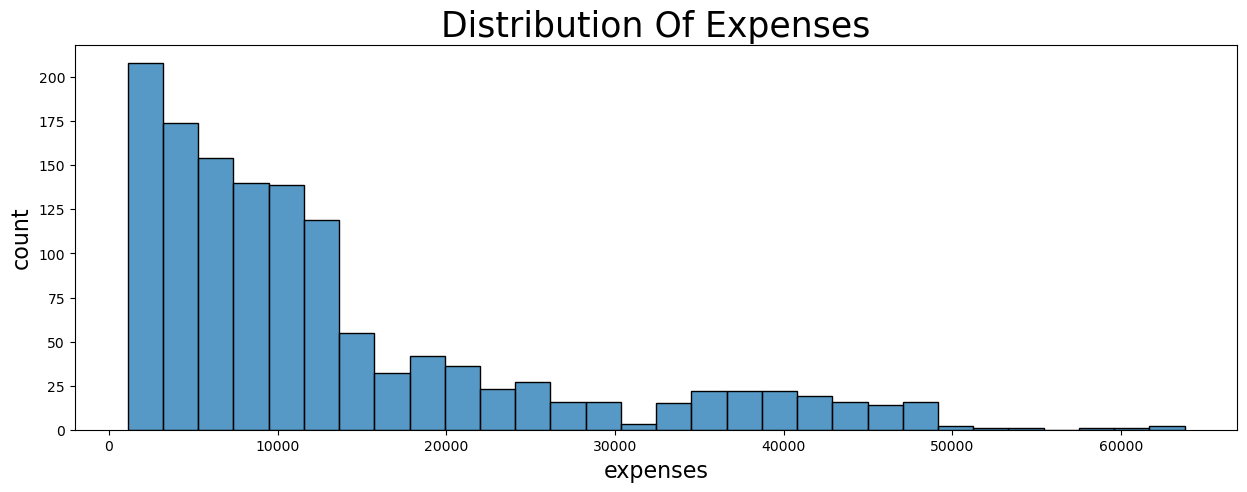

In [15]:
plt.figure(figsize=(15,5))
plt.title("Distribution Of Expenses",fontsize=25)
g = sns.histplot(x='expenses',data=insurance_data)
g.set_xlabel("expenses", fontsize=16)
g.set_ylabel("count", fontsize=16)

Text(0, 0.5, 'expenses')

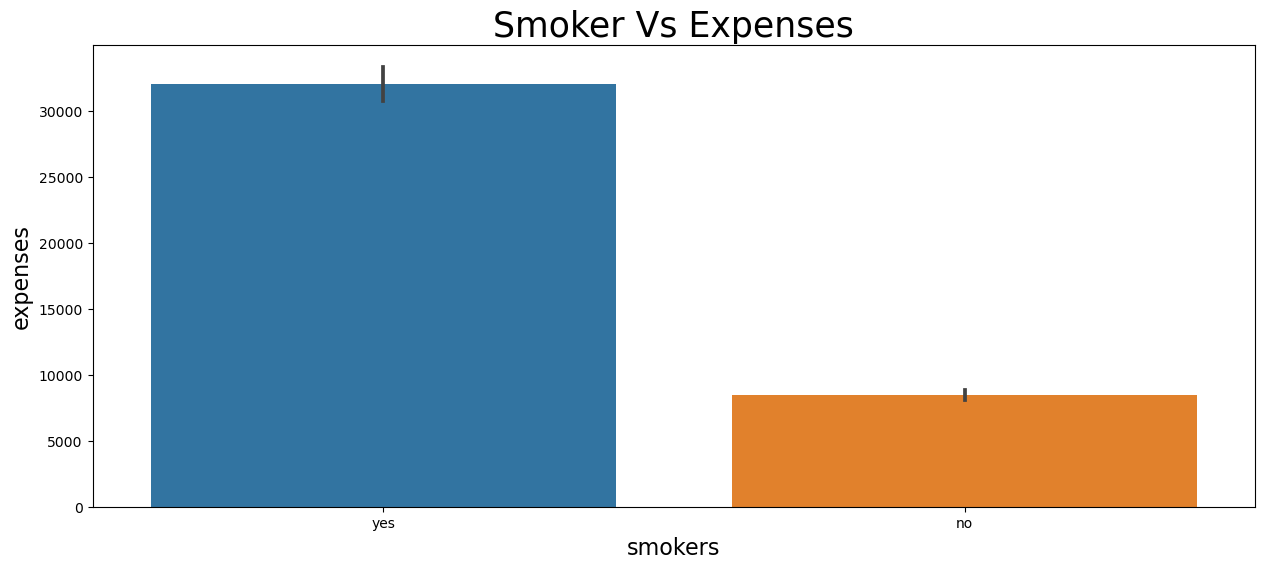

In [16]:
#Smokers Vs Expenses
plt.figure(figsize=(15,6))
plt.title("Smoker Vs Expenses",fontsize=25)
sve=sns.barplot(x='smoker',y='expenses',data=insurance_data)
sve.set_xlabel("smokers", fontsize=16)
sve.set_ylabel("expenses", fontsize=16)

### Expenses of Smokers are more compared to expenses of non smokers

Text(0, 0.5, 'expenses')

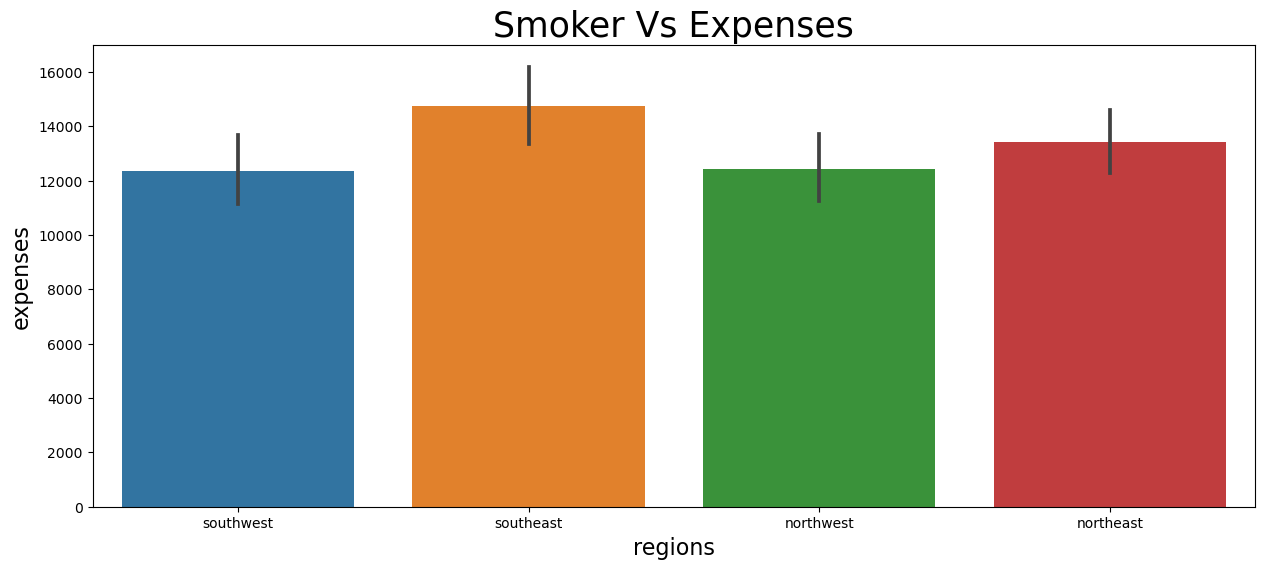

In [17]:
#Regions Vs Expenses
plt.figure(figsize=(15,6))
plt.title("Smoker Vs Expenses",fontsize=25)
rve=sns.barplot(x='region',y='expenses',data=insurance_data)
rve.set_xlabel("regions", fontsize=16)
rve.set_ylabel("expenses", fontsize=16)


### Expenses in Southeast region is more compared to other regions

Text(0, 0.5, 'expenses')

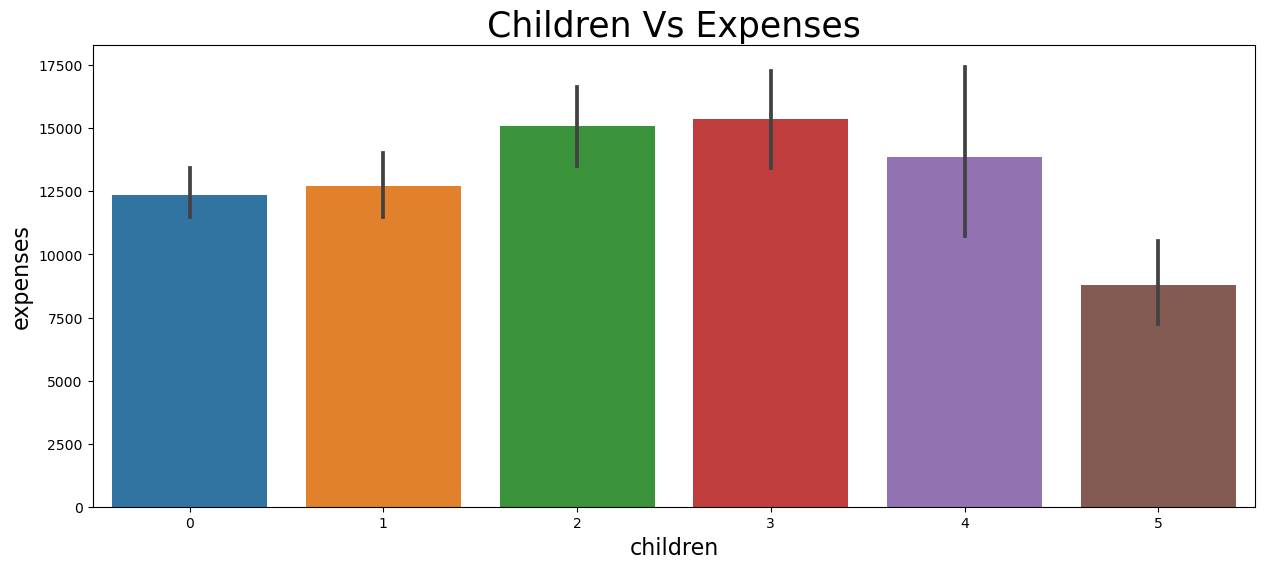

In [18]:
#Children Vs Expenses
plt.figure(figsize=(15,6))
plt.title("Children Vs Expenses",fontsize=25)
cve=sns.barplot(x='children',y='expenses',data=insurance_data)
cve.set_xlabel("children", fontsize=16)
cve.set_ylabel("expenses", fontsize=16)

### More number of children more expenses

## Correlation Matrix

In [19]:
cor = insurance_data.corr()
cor

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

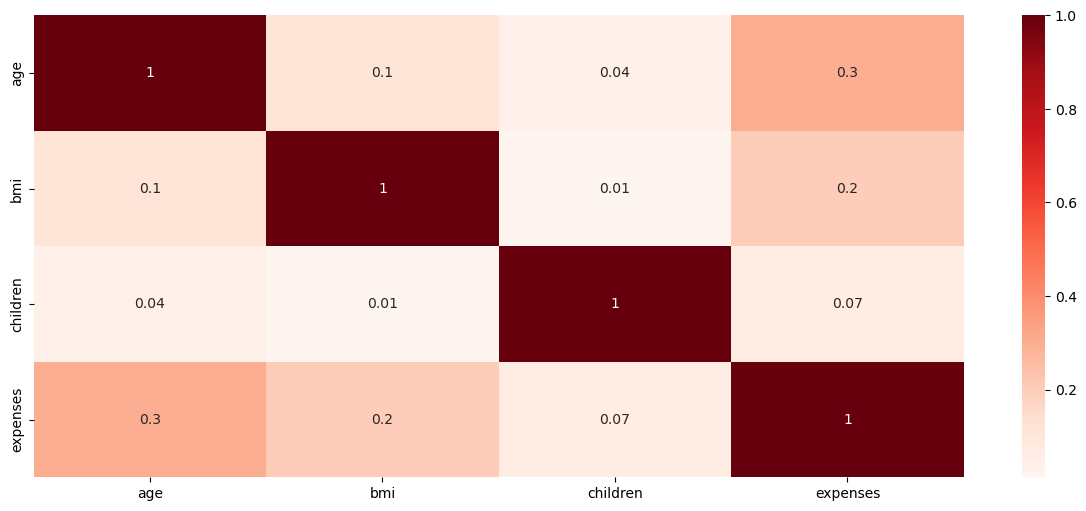

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,fmt='.1g',cmap='Reds', annot=True)

In [21]:
insurance_data.expenses.corr(insurance_data.age)

0.29900819228508274

In [22]:
insurance_data.expenses.corr(insurance_data.bmi)

0.198576255018932

## Correlation for Categorical Variables
  ### To calculate correlation for categorical variables , first that needs to be converted to numerical values

In [23]:
sex_values ={'female':0,'male':1}
sex_numeric = insurance_data.sex.map(sex_values)
insurance_data.expenses.corr(sex_numeric)

0.05729206999169401

In [24]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = insurance_data.smoker.map(smoker_values)
insurance_data.expenses.corr(smoker_numeric)

0.7872514298985536

In [25]:
region_values = {'southwest': 1, 'southeast': 2,'northwest':3,'northeast':4}
region_numeric = insurance_data.smoker.map(region_values)
insurance_data.expenses.corr(region_numeric)

nan

### Smoker and expenses seems to be highly correlated

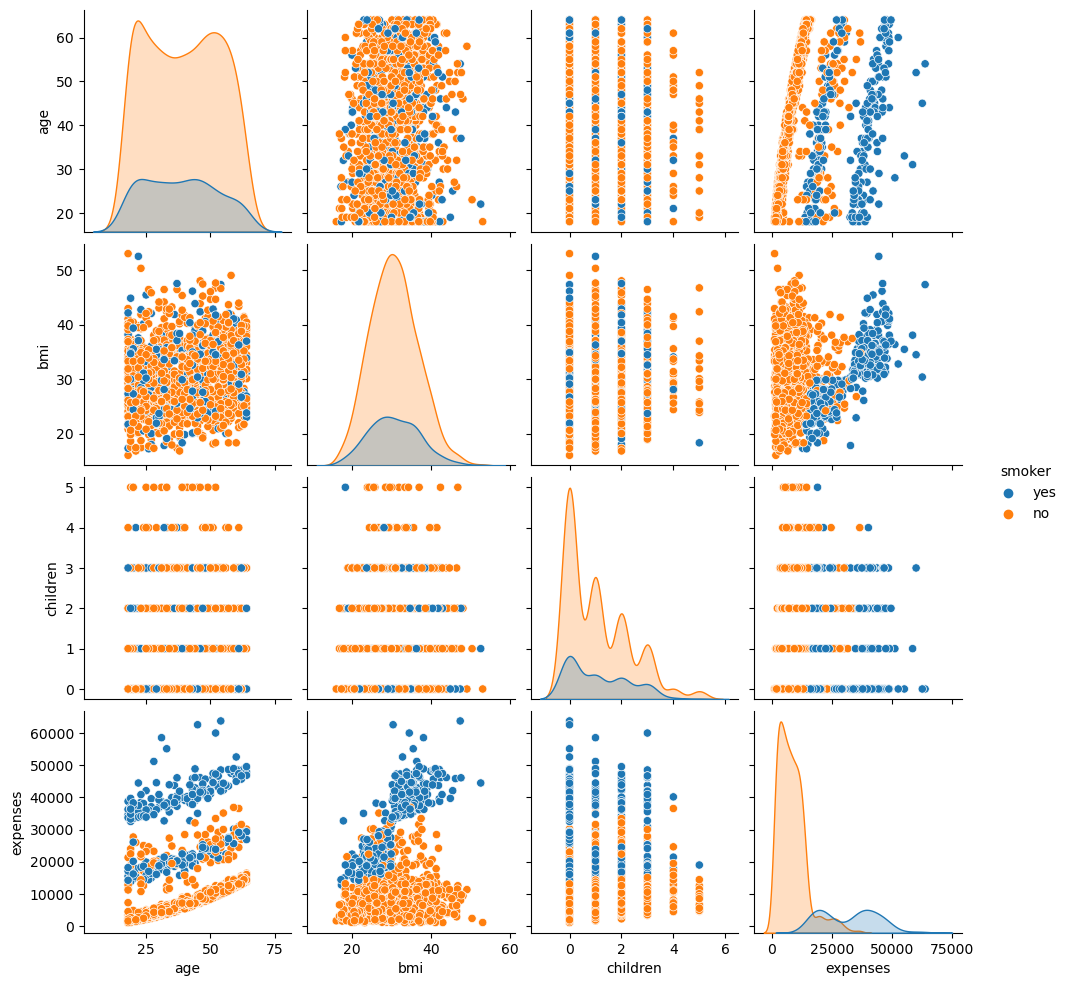

In [26]:
sns.pairplot(data=insurance_data,hue='smoker')


In [27]:
insurance_data["sex"] = insurance_data["sex"].map({"female": 0, "male": 1})
insurance_data["smoker"] = insurance_data["smoker"].map({"no": 0, "yes": 1})
insurance_data["region"] = insurance_data["region"].map({'southwest': 1, 'southeast': 2,'northwest':3,'northeast':4})

In [28]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


## Splitting independent and dependent variable

In [29]:
X = insurance_data.drop(['expenses'],axis=1)
y = insurance_data['expenses']

In [30]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [31]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

## Splitting the Dataset into Training and Testing

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_test.shape)


(1070, 6) (268,)


In [33]:
# Evaluation metrics Function
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_predict  

def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
   
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    #RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test,squared=False))
    RMSE_model_test = mean_squared_error(y_test, y_pred_model_test,squared=False)
    print("RMSE for Testing Data: ", RMSE_model_test)
    
    
    R2Score_model_train = r2_score(y_train, y_pred_model_train)
    print("Training R2 Score: ", R2Score_model_train)
    R2Score_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing R2 Score: ",  R2Score_model_test)
    
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model * 100)

## Choosing the model

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [35]:
model_summary(lin_reg,"Linear Regression")

Linear Regression
RMSE for Training Data:  6105.492115695448
RMSE for Testing Data:  5799.920265829356
Training R2 Score:  0.7417300723597997
Testing R2 Score:  0.7833214205203848
Accuracy for 20 - Fold Cross Predicted:  74.71169453294266


## Decision Tree


In [36]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
dt_reg.fit(X_train, y_train) 


DecisionTreeRegressor(max_depth=5, random_state=13)

In [37]:
model_summary(dt_reg, "Decision Tree Regression")

Decision Tree Regression
RMSE for Training Data:  4172.314299103488
RMSE for Testing Data:  5119.763291336907
Training R2 Score:  0.8793891095338366
Testing R2 Score:  0.8311614173587286
Accuracy for 20 - Fold Cross Predicted:  85.01480165312958


## Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
model_summary(rf_reg, "Random Forest Regression")

Random Forest Regression
RMSE for Training Data:  1892.8384844521443
RMSE for Testing Data:  4535.347186243426
Training R2 Score:  0.9751766948575941
Testing R2 Score:  0.867506976669226
Accuracy for 20 - Fold Cross Predicted:  83.43189163302856


In [40]:
y_predict = rf_reg.predict(X_test)

In [41]:
predicted_data = pd.DataFrame(data={"Predicted Premium Amount": y_predict})
print(predicted_data.head())

   Predicted Premium Amount
0                10286.4454
1                 5130.1526
2                27989.1571
3                11415.5518
4                34368.6584


## Gradient Boosting Regression

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train,y_train)


GradientBoostingRegressor()

In [43]:
model_summary(gb_reg, "Gradient Boost Regression")

Gradient Boost Regression
RMSE for Training Data:  3845.4985052320158
RMSE for Testing Data:  4399.630640010387
Training R2 Score:  0.8975439083253705
Testing R2 Score:  0.8753178251195601
Accuracy for 20 - Fold Cross Predicted:  85.86469968548462


## Ada Boost Regression

In [44]:
from sklearn.ensemble import AdaBoostRegressor
ab_reg = AdaBoostRegressor()
ab_reg.fit(X_train,y_train)

AdaBoostRegressor()

In [45]:
model_summary(ab_reg,"Ada Boost Regression")

Ada Boost Regression
RMSE for Training Data:  5295.114843087453
RMSE for Testing Data:  5519.419600829148
Training R2 Score:  0.8057400561654762
Testing R2 Score:  0.8037730034978285
Accuracy for 20 - Fold Cross Predicted:  81.73177216598825


## K-Nearest Neighbors Regression

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)


KNeighborsRegressor()

In [47]:
model_summary(knn_reg,"K-Nearest Neighbors Regression")

K-Nearest Neighbors Regression
RMSE for Training Data:  9420.159568498799
RMSE for Testing Data:  11512.704646217035
Training R2 Score:  0.3851785509979524
Testing R2 Score:  0.1462579752560924
Accuracy for 20 - Fold Cross Predicted:  11.393340450136302


##  XGBoost Regressor

In [48]:
!pip install xgboost

In [49]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123,verbosity=0)
xg_reg.fit(X_train,y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [50]:
model_summary(xg_reg,"XG Boost Regression")

XG Boost Regression
RMSE for Training Data:  3532.475616841348
RMSE for Testing Data:  4432.372890676425
Training R2 Score:  0.9135448563133404
Testing R2 Score:  0.8734551389221089
Accuracy for 20 - Fold Cross Predicted:  84.85860796250945


Of all these algorithms Gradient Boosting Regression have high accuracy of 85 % with good RMSE score 

In [51]:
#Save the model as pickle file
import pickle
pickle.dump(gb_reg,open('gb_reg_model.pkl','wb'))
